<a href="https://colab.research.google.com/github/arsalanmontazeri/Arsalan-Montazeri/blob/study-abroad/abroad_cost_of_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_column',None)
# For data modeling
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
# For saving models
import pickle

In [30]:
study=pd.read_csv('abroad  - Sheet1.csv')

In [31]:
study.head()

,COUNTRY,COURSE TYPE,COURSE (SPECIALIZATION),FEES
0,GERMANY,MBA,MBA in Sales & Marketing,3678127.31
1,GERMANY,MBA,MBA in Banking,1253594.37
2,GERMANY,MBA,MBA in Business Administration,454540.69
3,GERMANY,MBA,MBA in Hospital/Healthcare Management,3246719.22
4,GERMANY,MBA,MBA in Human Resource Management,1217519.71


In [32]:
study.shape

(489, 4)

In [33]:
study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   COUNTRY                  489 non-null    object
 1   COURSE TYPE              489 non-null    object
 2   COURSE (SPECIALIZATION)  489 non-null    object
 3   FEES                     489 non-null    object
dtypes: object(4)
memory usage: 15.4+ KB


In [34]:
study.describe()

,COUNTRY,COURSE TYPE,COURSE (SPECIALIZATION),FEES
count,489,489,489,489
unique,11,4,189,385
top,GERMANY,MASTERS OF MANAGEMENT,M.ENG in Electrical,904770
freq,61,166,11,10


In [35]:
study.isnull().sum()

,0
COUNTRY,0
COURSE TYPE,0
COURSE (SPECIALIZATION),0
FEES,0


<ipython-input-36-c5302a7c81e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countries['COUNTRY'],y=countries['count'],palette='coolwarm')


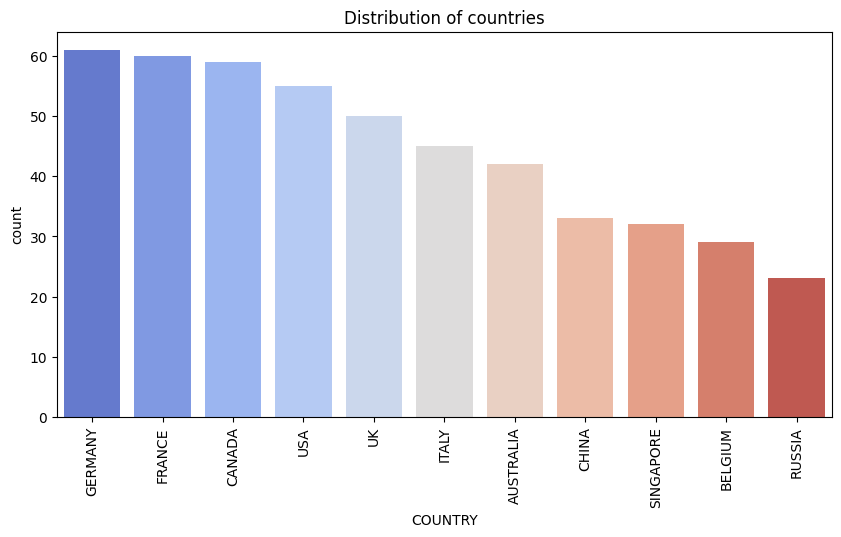

In [36]:
countries=study['COUNTRY'].value_counts().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x=countries['COUNTRY'],y=countries['count'],palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Distribution of countries')
plt.show()

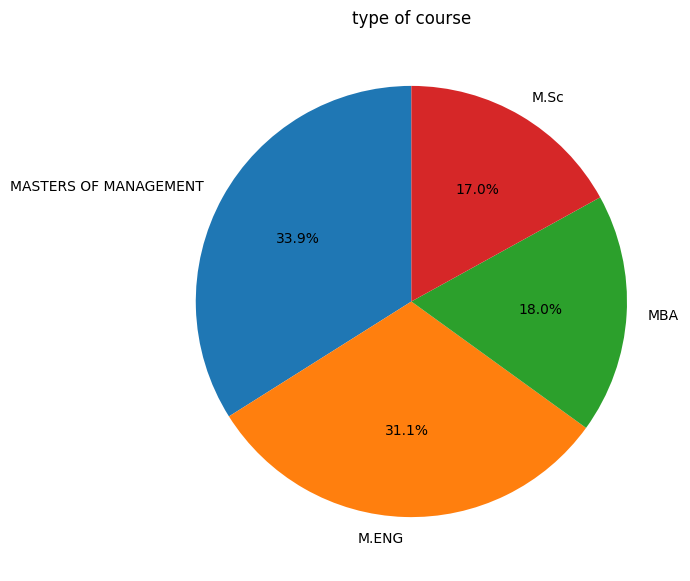

In [37]:
course_type=study['COURSE TYPE'].value_counts().reset_index()
course_type
plt.figure(figsize=(7, 7))
plt.pie(course_type['count'], labels=course_type['COURSE TYPE'], autopct='%1.1f%%', startangle=90)
plt.title('type of course')
plt.show()


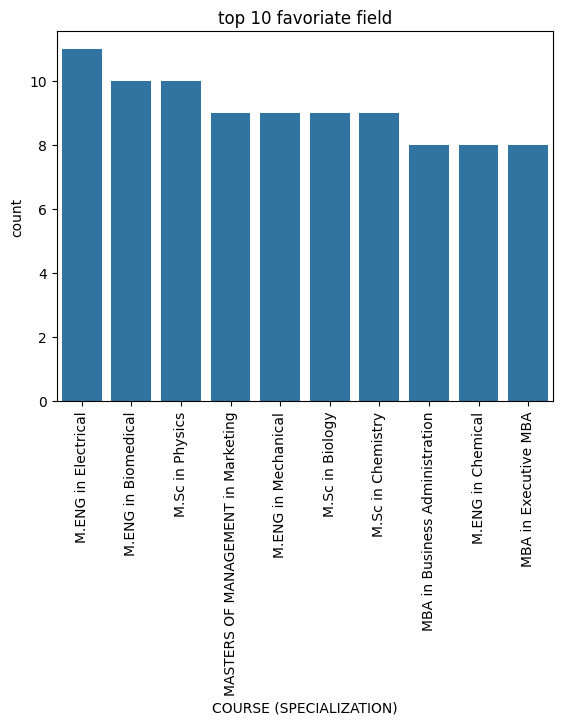

In [38]:
SPECIALIZATION=study['COURSE (SPECIALIZATION)'].value_counts().reset_index()
top_field=SPECIALIZATION.head(10)
sns.barplot(x=top_field['COURSE (SPECIALIZATION)'],y=top_field['count'],)
plt.xticks(rotation=90)
plt.title('top 10 favoriate field')
plt.show()

      COUNTRY            COURSE TYPE          FEES
0       CHINA                    MBA  1.070589e+08
1         USA                  M.ENG  3.335177e+06
2         USA                   M.Sc  3.266432e+06
3         USA  MASTERS OF MANAGEMENT  3.231315e+06
4         USA                    MBA  3.075194e+06
5     BELGIUM                    MBA  2.740150e+06
6          UK                    MBA  2.636347e+06
7          UK                   M.Sc  2.533625e+06
8          UK                  M.ENG  2.368668e+06
9   SINGAPORE                    MBA  2.308623e+06
10  AUSTRALIA                  M.ENG  2.078923e+06
11  AUSTRALIA                   M.Sc  2.047415e+06
12     CANADA                    MBA  2.035120e+06
13  AUSTRALIA                    MBA  2.018945e+06
14         UK  MASTERS OF MANAGEMENT  1.982086e+06
15  AUSTRALIA  MASTERS OF MANAGEMENT  1.920886e+06
16     CANADA  MASTERS OF MANAGEMENT  1.875723e+06
17     CANADA                  M.ENG  1.855741e+06
18     FRANCE                  

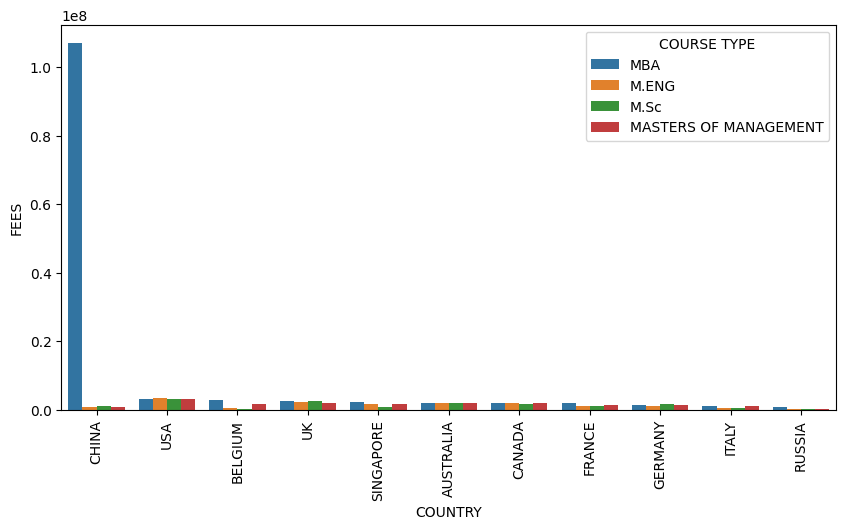

In [39]:
study['FEES'] = pd.to_numeric(study['FEES'], errors='coerce')
course_fee=study.groupby(['COUNTRY','COURSE TYPE'])['FEES'].mean().sort_values(ascending=False).reset_index()
print(course_fee)
plt.figure(figsize=(10,5))
sns.barplot(data=course_fee,x='COUNTRY',y='FEES',hue='COURSE TYPE')
plt.xticks(rotation=90)
plt.show()

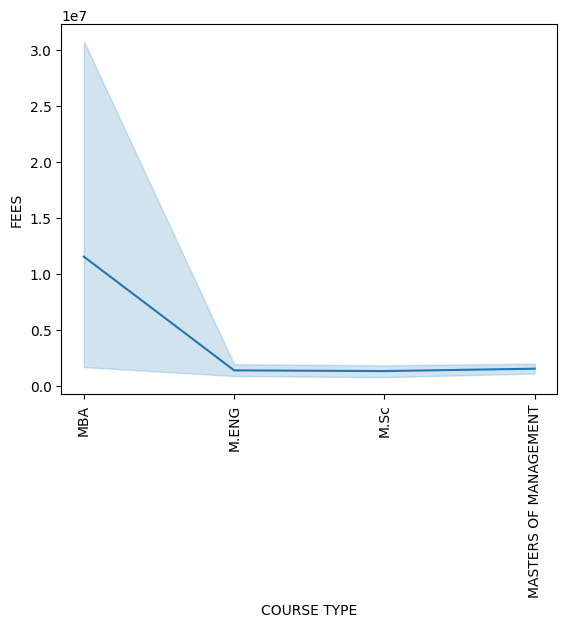

In [40]:
sns.lineplot(x=course_fee['COURSE TYPE'],y=course_fee['FEES'])
plt.xticks(rotation=90)
plt.show()